<a href="https://colab.research.google.com/github/LukmanAP/dataset1/blob/main/K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('datakelulusanmahasiswa.csv')

In [ ]:
x = dataset.iloc[:,[1,2,3,4,13]]
y = dataset.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
kelulusan = LabelEncoder()
y = kelulusan.fit_transform(y)

In [ ]:
x.head()

,JENIS KELAMIN,STATUS 0,UMUR,STATUS NIKAH,IPK
0,1,1,28,1,3.07
1,1,0,32,1,3.17
2,1,1,29,1,3.54
3,1,0,27,1,3.41
4,1,1,29,1,3.09


In [ ]:
print(y)

[1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1
 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1
 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0]


Membagi data untuk Data Training dan Data testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
print(x_train)

     JENIS KELAMIN  STATUS 0  UMUR  STATUS NIKAH  IPK 
287              0         0    24             1  2.99
334              0         0    23             1  3.53
124              0         0    25             1  3.28
22               0         0    26             1  3.11
216              1         0    26             1  3.51
..             ...       ...   ...           ...   ...
323              1         0    24             1  3.52
192              0         0    25             1  2.59
117              0         0    24             1  3.57
47               0         1    28             1  3.24
172              1         1    25             1  1.93

[282 rows x 5 columns]


In [ ]:
print(x_test)

     JENIS KELAMIN  STATUS 0  UMUR  STATUS NIKAH  IPK 
122              1         0    26             1  2.48
297              0         0    23             1  2.53
313              0         0    23             1  3.32
366              1         0    23             1  2.88
204              1         1    24             1  2.87
..             ...       ...   ...           ...   ...
49               0         1    27             1  2.66
330              0         0    27             1  3.50
252              0         0    30             1  2.68
276              1         0    25             1  3.02
229              0         1    27             1  2.94

[94 rows x 5 columns]


In [ ]:
print(y_train)

[0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1
 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0
 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1
 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1
 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0
 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1]


In [ ]:
print(y_test)

[0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1
 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1]


Skaling Data untuk Variabel X

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[-0.75277265 -0.72980045 -0.58660697  0.14744196  0.15070475]
 [-0.75277265 -0.72980045 -0.9053414   0.14744196  1.27567137]
 [-0.75277265 -0.72980045 -0.26787255  0.14744196  0.75485349]
 ...
 [-0.75277265 -0.72980045 -0.58660697  0.14744196  1.35900223]
 [-0.75277265  1.37023758  0.68833072  0.14744196  0.67152263]
 [ 1.32842233  1.37023758 -0.26787255  0.14744196 -2.05756307]]


In [ ]:
print(x_test)

[[ 1.32842233e+00 -7.29800449e-01  5.08618761e-02  1.47441956e-01
  -9.11763730e-01]
 [-7.52772653e-01 -7.29800449e-01 -9.05341395e-01  1.47441956e-01
  -8.07600153e-01]
 [-7.52772653e-01 -7.29800449e-01 -9.05341395e-01  1.47441956e-01
   8.38184352e-01]
 [ 1.32842233e+00 -7.29800449e-01 -9.05341395e-01  1.47441956e-01
  -7.84551192e-02]
 [ 1.32842233e+00  1.37023758e+00 -5.86606971e-01  1.47441956e-01
  -9.92878344e-02]
 [-7.52772653e-01 -7.29800449e-01  3.69596300e-01  1.47441956e-01
   1.40066766e+00]
 [ 1.32842233e+00 -7.29800449e-01 -2.67872548e-01  1.47441956e-01
   1.06734422e+00]
 [ 1.32842233e+00 -7.29800449e-01 -2.67872548e-01  1.47441956e-01
   9.00682498e-01]
 [-7.52772653e-01  1.37023758e+00  1.32579957e+00  1.47441956e-01
  -1.22425446e+00]
 [-7.52772653e-01  1.37023758e+00  5.08618761e-02  1.47441956e-01
  -1.59569734e-02]
 [-7.52772653e-01 -7.29800449e-01 -5.86606971e-01  1.47441956e-01
  -1.82618695e-01]
 [-7.52772653e-01 -7.29800449e-01 -5.86606971e-01  1.47441956e-01

Modeling Menggunakan KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 1)
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', p=1)

Tentukan Prediksinya

In [ ]:
y_pred = classifier.predict(x_test)

menghitung validasinya menggunakan konfision metrix 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[45  7]
 [ 6 36]]


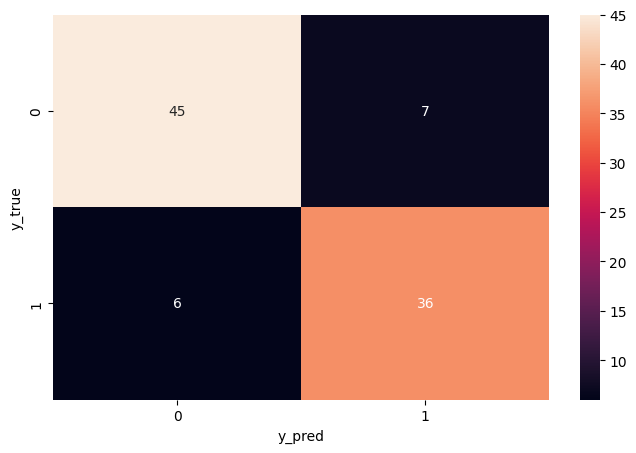

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        52
           1       0.84      0.86      0.85        42

    accuracy                           0.86        94
   macro avg       0.86      0.86      0.86        94
weighted avg       0.86      0.86      0.86        94

